Saving fer2013.csv to fer2013 (1).csv
Dataset shape: (35887, 3)
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Train: (28709, 48, 48, 1) (28709, 7)
Val: (3589, 48, 48, 1) (3589, 7)
Test: (3589, 48, 48, 1) (3589, 7)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 87s 191ms/step - accuracy: 0.2769 - loss: 1.7713 - val_accuracy: 0.4101 - val_loss: 1.5310
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - accuracy: 0.3986 - loss: 1.5435 - val_accuracy: 0.4508 - val_loss: 1.4382
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 193ms/step - accuracy: 0.4471 - loss: 1.4513 - val_accuracy: 0.4787 - val_loss: 1.3761
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 145s 200ms/step - accuracy: 0.4621 - loss: 1.3921 - val_accuracy: 0.4937 - val_loss: 1.3338
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 137s 189ms/step - accuracy: 0.4808 - loss: 1.3489 - val_accuracy: 0.4901 - val_loss: 1.3225
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 190ms/step - accuracy: 0.4994 - loss: 1.3016 - val_accuracy: 0.5135 - val_loss: 1.2820
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.5213 - loss: 1.2557 - val_accuracy: 0.5152 - val_loss: 1.2681
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 144s 194ms/step - accuracy: 0.5301 - lo

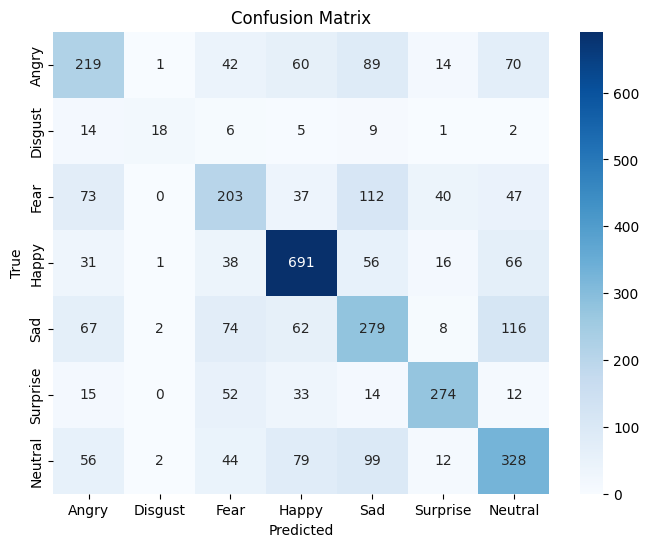

✅ Model saved at models/baseline_emotion_cnn.h5


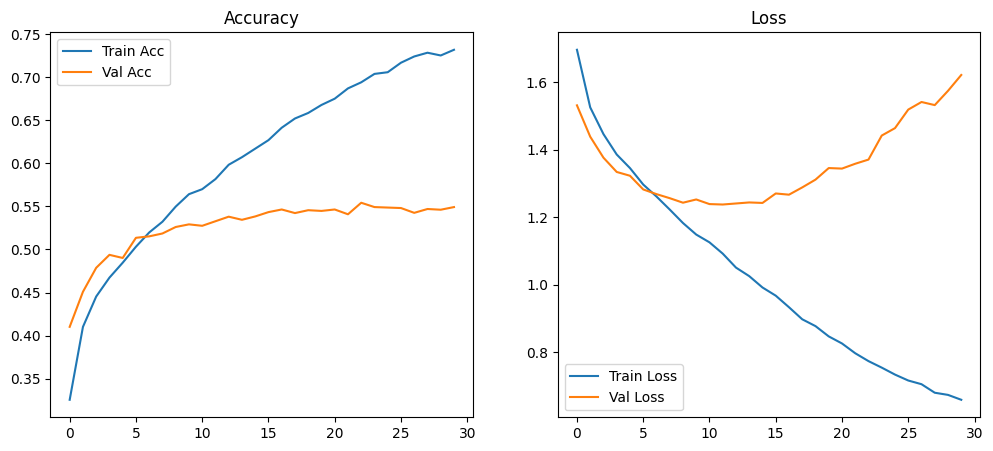

In [ ]:
# Step 1: Install dependencies (Colab already has most, but just in case)
!pip install tensorflow numpy pandas scikit-learn matplotlib seaborn

# Step 2: Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 3: Load FER2013 dataset (upload fer2013.csv first in Colab)
from google.colab import files
uploaded = files.upload()

# Ensure you have "fer2013.csv" uploaded
data = pd.read_csv("fer2013.csv")

print("Dataset shape:", data.shape)
print(data.head())

# Step 4: Preprocess data
num_classes = 7
emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

# Convert pixel strings to arrays
pixels = data['pixels'].tolist()
X = np.array([np.fromstring(p, sep=' ') for p in pixels], dtype='float32')
X = X.reshape(-1, 48, 48, 1) / 255.0  # normalize

y = pd.get_dummies(data['emotion']).values

# Train/Val/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

# Step 5: Build Baseline CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Step 6: Train
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val)
)

# Step 7: Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Step 8: Confusion Matrix & Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=emotion_labels))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels,
            yticklabels=emotion_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Save Model
os.makedirs("models", exist_ok=True)
model.save("models/baseline_emotion_cnn.h5")
print("✅ Model saved at models/baseline_emotion_cnn.h5")

# Step 10: Plot Training History
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()


In [3]:
from google.colab import files
files.download("models/baseline_emotion_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>